In [83]:
%matplotlib inline

In [140]:
from datetime import datetime

import numpy as np
from pandas import Series, DataFrame
import pandas as pd

In [85]:
import pylab as plt

# Introduction to Pandas

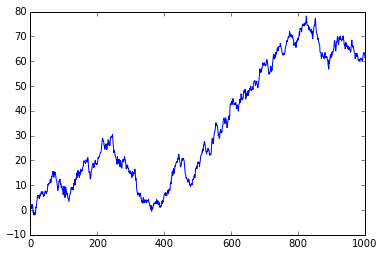

In [86]:
# plot a random walk
plt.plot(np.random.randn(1000).cumsum())

## play with numpy arrays

In [87]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [88]:
np.arange(5)[2]

2

In [89]:
np.arange(5)[2:]

array([2, 3, 4])

In [90]:
## use pandas to add an index tothis array

In [91]:
index = ['a', 'b', 'c', 'd', 'e']

In [92]:
s = Series(np.arange(5), index=index)
s

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [93]:
s.index

Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')

In [94]:
s.values

array([0, 1, 2, 3, 4])

In [95]:
# Series objects behave like numpy arrays
s * 2

a    0
b    2
c    4
d    6
e    8
dtype: int64

In [96]:
s * s

a     0
b     1
c     4
d     9
e    16
dtype: int64

In [97]:
s[:3]

a    0
b    1
c    2
dtype: int64

In [98]:
s['b']

1

In [99]:
s['b':]

b    1
c    2
d    3
e    4
dtype: int64

In [100]:
s[[1, 0, 2]]

b    1
a    0
c    2
dtype: int64

In [101]:
s[['b', 'd', 'e']]

b    1
d    3
e    4
dtype: int64

# Date ranges

In [102]:
dates = pd.date_range('2012-07-16', '2012-07-21')

In [103]:
dates

DatetimeIndex(['2012-07-16', '2012-07-17', '2012-07-18', '2012-07-19',
               '2012-07-20', '2012-07-21'],
              dtype='datetime64[ns]', freq='D')

In [104]:
# time series of temperatures (in F) in Austin
atemps = Series([101.5, 98, 95, 99, 100, 92], index=dates)

In [105]:
atemps.index

DatetimeIndex(['2012-07-16', '2012-07-17', '2012-07-18', '2012-07-19',
               '2012-07-20', '2012-07-21'],
              dtype='datetime64[ns]', freq='D')

In [106]:
idx = atemps.index[2]
idx

Timestamp('2012-07-18 00:00:00', offset='D')

In [107]:
atemps[idx]

95.0

In [108]:
# another time series of temperatures (in F) in San Diego
sdtemps =  Series([77, 73, 77, 78, 75, 79], index=dates)

## multiple time series in a DataFrame

In [109]:
temps = DataFrame({'austin': atemps, 'san diego': sdtemps})

In [110]:
temps

,austin,san diego
2012-07-16,101.5,77
2012-07-17,98.0,73
2012-07-18,95.0,77
2012-07-19,99.0,78
2012-07-20,100.0,75
2012-07-21,92.0,79


In [111]:
temps.index

DatetimeIndex(['2012-07-16', '2012-07-17', '2012-07-18', '2012-07-19',
               '2012-07-20', '2012-07-21'],
              dtype='datetime64[ns]', freq='D')

In [112]:
temps.columns

Index([u'austin', u'san diego'], dtype='object')

In [113]:
temps['san diego']

2012-07-16    77
2012-07-17    73
2012-07-18    77
2012-07-19    78
2012-07-20    75
2012-07-21    79
Freq: D, Name: san diego, dtype: int64

In [114]:
temps['difference'] = temps['austin'] - temps['san diego']

In [115]:
temps

,austin,san diego,difference
2012-07-16,101.5,77,24.5
2012-07-17,98.0,73,25.0
2012-07-18,95.0,77,18.0
2012-07-19,99.0,78,21.0
2012-07-20,100.0,75,25.0
2012-07-21,92.0,79,13.0


In [116]:
del temps['difference']

In [117]:
temps

,austin,san diego
2012-07-16,101.5,77
2012-07-17,98.0,73
2012-07-18,95.0,77
2012-07-19,99.0,78
2012-07-20,100.0,75
2012-07-21,92.0,79


In [118]:
temps.austin

2012-07-16    101.5
2012-07-17     98.0
2012-07-18     95.0
2012-07-19     99.0
2012-07-20    100.0
2012-07-21     92.0
Freq: D, Name: austin, dtype: float64

In [119]:
# access the third row of the dataframe
temps.ix[2]

austin       95
san diego    77
Name: 2012-07-18 00:00:00, dtype: float64

In [120]:
# or use the index to get the same row
ridx = temps.index[2]
temps.ix[ridx]

austin       95
san diego    77
Name: 2012-07-18 00:00:00, dtype: float64

In [121]:
# access the 'austin' column of the third row
temps.ix[ridx, 'austin']

95.0

In [122]:
# access the 'austin' column of all rows (beginning w/ the third)
temps.ix[ridx:, 'austin']

2012-07-18     95
2012-07-19     99
2012-07-20    100
2012-07-21     92
Freq: D, Name: austin, dtype: float64

In [123]:
# access the 'austin' and 'san diego' columns of all rows (beginning w/ the third)
temps.ix[ridx:, ['austin', 'san diego']]

,austin,san diego
2012-07-18,95,77
2012-07-19,99,78
2012-07-20,100,75
2012-07-21,92,79


# mean of Series

In [124]:
# mean of DataFrame columns
temps.mean()

austin       97.583333
san diego    76.500000
dtype: float64

In [125]:
# mean of DataFrame rows
temps.mean(1)

2012-07-16    89.25
2012-07-17    85.50
2012-07-18    86.00
2012-07-19    88.50
2012-07-20    87.50
2012-07-21    85.50
Freq: D, dtype: float64

In [126]:
# deviations from the column mean
temps - temps.mean()

,austin,san diego
2012-07-16,3.916667,0.5
2012-07-17,0.416667,-3.5
2012-07-18,-2.583333,0.5
2012-07-19,1.416667,1.5
2012-07-20,2.416667,-1.5
2012-07-21,-5.583333,2.5


In [127]:
# select all rows where the temperature in Austin is above 100 F
temps[temps.austin > 100]

,austin,san diego
2012-07-16,101.5,77


# pd.read_csv with parse_dates parameter

Can't show this because the tutorial materials are no longer available.
(Video: starts at 40m)

# Timestamp



In [129]:
# starts at 53m

# Timestamp is a subclass of datetime.datetime which supports nanoseconds
pd.Timestamp.mro()

[pandas.tslib.Timestamp,
 pandas.tslib._Timestamp,
 datetime.datetime,
 datetime.date,
 object]

In [136]:
pd.Timestamp('2016')

Timestamp('2016-01-01 00:00:00')

In [151]:
pd.Timestamp('7/2/2012 10:06')

Timestamp('2012-07-02 10:06:00')

In [154]:
# month-first vs. day-first date parsing
print pd.to_datetime('7/2/2012')
print pd.to_datetime('7/2/2012', dayfirst=True)

2012-07-02 00:00:00
2012-02-07 00:00:00


In [137]:
stamp = pd.Timestamp('17.7.2012 1006')
stamp

Timestamp('2012-07-17 10:06:00')

In [138]:
stamp.strftime("%Y%m%d")

'20120717'

In [139]:
stamp.value # nanosecond timestamp

1342519560000000000

In [141]:
dates = ['2012-07-16', '2012-07-18', '2012-07-20']

In [144]:
date_series = Series(range(3), index=dates)
date_series

2012-07-16    0
2012-07-18    1
2012-07-20    2
dtype: int64

In [145]:
date_series.index[0] # the index is still a string!

'2012-07-16'

In [146]:
pd.DatetimeIndex(dates)

DatetimeIndex(['2012-07-16', '2012-07-18', '2012-07-20'], dtype='datetime64[ns]', freq=None)

In [149]:
# create a series with a proper datetime index
date_series = Series(range(3), index=pd.DatetimeIndex(dates))
print date_series
print date_series.index[0]

2012-07-16    0
2012-07-18    1
2012-07-20    2
dtype: int64
2012-07-16 00:00:00


# Time Series indexing

In [157]:
pd.date_range('2012-07-12', periods=5)

DatetimeIndex(['2012-07-12', '2012-07-13', '2012-07-14', '2012-07-15',
               '2012-07-16'],
              dtype='datetime64[ns]', freq='D')

In [159]:
rng = pd.date_range('2012-07-12', periods=1000)
rng

DatetimeIndex(['2012-07-12', '2012-07-13', '2012-07-14', '2012-07-15',
               '2012-07-16', '2012-07-17', '2012-07-18', '2012-07-19',
               '2012-07-20', '2012-07-21',
               ...
               '2015-03-29', '2015-03-30', '2015-03-31', '2015-04-01',
               '2015-04-02', '2015-04-03', '2015-04-04', '2015-04-05',
               '2015-04-06', '2015-04-07'],
              dtype='datetime64[ns]', length=1000, freq='D')

In [160]:
ts = Series(np.arange(1000), index=rng)
ts

2012-07-12      0
2012-07-13      1
2012-07-14      2
2012-07-15      3
2012-07-16      4
2012-07-17      5
2012-07-18      6
2012-07-19      7
2012-07-20      8
2012-07-21      9
2012-07-22     10
2012-07-23     11
2012-07-24     12
2012-07-25     13
2012-07-26     14
2012-07-27     15
2012-07-28     16
2012-07-29     17
2012-07-30     18
2012-07-31     19
2012-08-01     20
2012-08-02     21
2012-08-03     22
2012-08-04     23
2012-08-05     24
2012-08-06     25
2012-08-07     26
2012-08-08     27
2012-08-09     28
2012-08-10     29
             ... 
2015-03-09    970
2015-03-10    971
2015-03-11    972
2015-03-12    973
2015-03-13    974
2015-03-14    975
2015-03-15    976
2015-03-16    977
2015-03-17    978
2015-03-18    979
2015-03-19    980
2015-03-20    981
2015-03-21    982
2015-03-22    983
2015-03-23    984
2015-03-24    985
2015-03-25    986
2015-03-26    987
2015-03-27    988
2015-03-28    989
2015-03-29    990
2015-03-30    991
2015-03-31    992
2015-04-01    993
2015-04-02

In [161]:
ts[datetime(2013, 1, 29)]

201

In [163]:
ts['2013-01-29']

201

In [162]:
ts[ts.index[201]]

201

In [165]:
# attention: slicing using datestrings includes the end element!
# this will only work on ordered time series!
ts[:'2012-07-20']

2012-07-12    0
2012-07-13    1
2012-07-14    2
2012-07-15    3
2012-07-16    4
2012-07-17    5
2012-07-18    6
2012-07-19    7
2012-07-20    8
Freq: D, dtype: int64